In [660]:
import pandas as pd

In [661]:
import seaborn as sns

In [662]:
import matplotlib.pyplot as plt

In [663]:
df= pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/MBAN 6110 - Data Science/Assignment 1/sales_data.csv')

In [664]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [665]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [666]:
print(df.head())

      Product    Region   Price  Units Sold   Sale Date
0         NaN  Region_6   75.96        10.0  2022-01-01
1         NaN  Region_1  175.78         8.0  2022-01-02
2  Product_46  Region_3   20.43        12.0  2022-01-03
3  Product_36  Region_1   12.77        10.0  2022-01-04
4  Product_17  Region_6  125.69         6.0  2022-01-05


In [667]:
print(df.dtypes)

Product        object
Region         object
Price         float64
Units Sold    float64
Sale Date      object
dtype: object


In [668]:
print(df.describe)

<bound method NDFrame.describe of          Product    Region   Price  Units Sold   Sale Date
0            NaN  Region_6   75.96        10.0  2022-01-01
1            NaN  Region_1  175.78         8.0  2022-01-02
2     Product_46  Region_3   20.43        12.0  2022-01-03
3     Product_36  Region_1   12.77        10.0  2022-01-04
4     Product_17  Region_6  125.69         6.0  2022-01-05
...          ...       ...     ...         ...         ...
1045  Product_45  Region_7   78.69         8.0  2022-07-28
1046   Product_1  Region_6     NaN         8.0  2022-08-02
1047  Product_17  Region_2  114.37        11.0  2023-12-18
1048         NaN  Region_8     NaN         5.0  2023-12-27
1049  Product_16  Region_2   69.30         8.0  2024-02-23

[1050 rows x 5 columns]>


In [669]:
print(df.isnull())

      Product  Region  Price  Units Sold  Sale Date
0        True   False  False       False      False
1        True   False  False       False      False
2       False   False  False       False      False
3       False   False  False       False      False
4       False   False  False       False      False
...       ...     ...    ...         ...        ...
1045    False   False  False       False      False
1046    False   False   True       False      False
1047    False   False  False       False      False
1048     True   False   True       False      False
1049    False   False  False       False      False

[1050 rows x 5 columns]


In [670]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1045     True
1046     True
1047     True
1048     True
1049     True
Length: 1050, dtype: bool


<Axes: xlabel='Units Sold', ylabel='Count'>

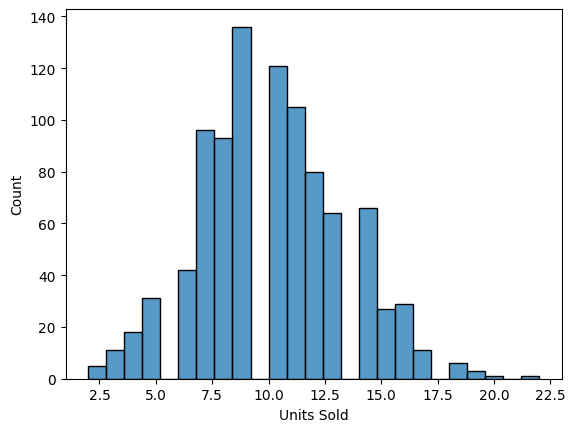

In [671]:
sns.histplot(df['Units Sold'])

In [672]:
num_of_products = df['Product'].value_counts()
print(num_of_products)

Product
Product_45    28
Product_5     28
Product_33    27
Product_1     26
Product_13    25
Product_30    24
Product_4     23
Product_43    23
Product_48    23
Product_29    23
Product_23    22
Product_40    22
Product_31    22
Product_37    21
Product_50    21
Product_15    20
Product_44    20
Product_42    20
Product_46    20
Product_19    20
Product_14    20
Product_17    20
Product_16    20
Product_35    19
Product_39    19
Product_41    19
Product_10    19
Product_2     19
Product_6     19
Product_7     18
Product_20    18
Product_28    17
Product_34    17
Product_25    17
Product_22    16
Product_8     16
Product_24    16
Product_32    16
Product_27    16
Product_21    15
Product_9     15
Product_18    14
Product_38    14
Product_11    14
Product_47    13
Product_36    13
Product_26    13
Product_49    13
Product_12    13
Product_3     11
Name: count, dtype: int64


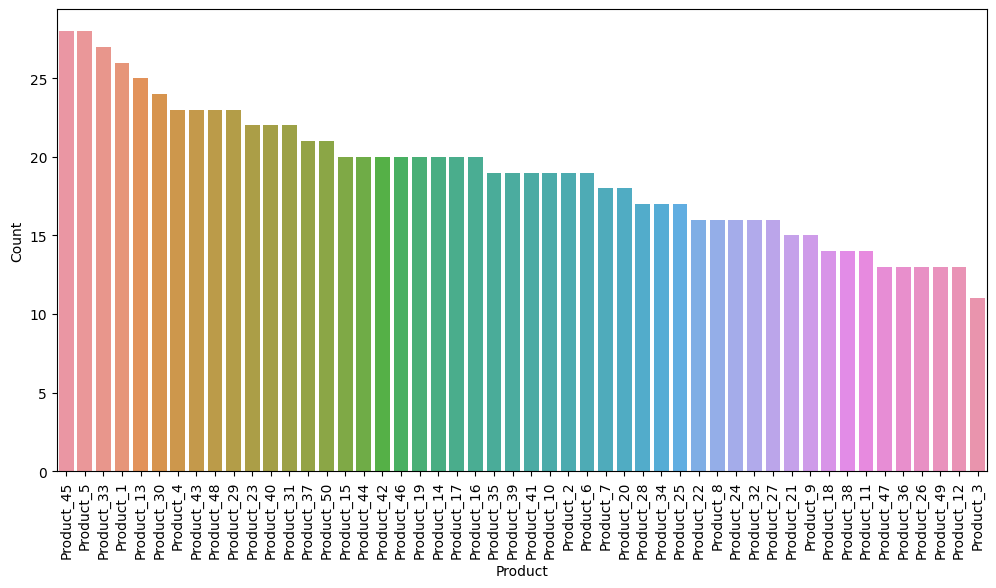

In [673]:
plt.figure(figsize=(12, 6))
sns.barplot(x=num_of_products.index, y=num_of_products.values)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

To begin the cleaning process, I want to ensure the values being used make sense. Many of the price entries included values past two decimal points. This doesn't make much sense in regards to pricing values, so I'll round all the values of that column to two decimal places.

In [674]:
df_clean = df.round({'price': 2})
print(df_clean)

         Product    Region   Price  Units Sold   Sale Date
0            NaN  Region_6   75.96        10.0  2022-01-01
1            NaN  Region_1  175.78         8.0  2022-01-02
2     Product_46  Region_3   20.43        12.0  2022-01-03
3     Product_36  Region_1   12.77        10.0  2022-01-04
4     Product_17  Region_6  125.69         6.0  2022-01-05
...          ...       ...     ...         ...         ...
1045  Product_45  Region_7   78.69         8.0  2022-07-28
1046   Product_1  Region_6     NaN         8.0  2022-08-02
1047  Product_17  Region_2  114.37        11.0  2023-12-18
1048         NaN  Region_8     NaN         5.0  2023-12-27
1049  Product_16  Region_2   69.30         8.0  2024-02-23

[1050 rows x 5 columns]


In [675]:
print(df_clean)

         Product    Region   Price  Units Sold   Sale Date
0            NaN  Region_6   75.96        10.0  2022-01-01
1            NaN  Region_1  175.78         8.0  2022-01-02
2     Product_46  Region_3   20.43        12.0  2022-01-03
3     Product_36  Region_1   12.77        10.0  2022-01-04
4     Product_17  Region_6  125.69         6.0  2022-01-05
...          ...       ...     ...         ...         ...
1045  Product_45  Region_7   78.69         8.0  2022-07-28
1046   Product_1  Region_6     NaN         8.0  2022-08-02
1047  Product_17  Region_2  114.37        11.0  2023-12-18
1048         NaN  Region_8     NaN         5.0  2023-12-27
1049  Product_16  Region_2   69.30         8.0  2024-02-23

[1050 rows x 5 columns]


I want to drop any duplicate entries. Any sales accidentally entered twice could really skew the data:

In [676]:
df_clean.drop_duplicates(inplace=True)

In [677]:
print(df_clean)

        Product     Region   Price  Units Sold   Sale Date
0           NaN   Region_6   75.96        10.0  2022-01-01
1           NaN   Region_1  175.78         8.0  2022-01-02
2    Product_46   Region_3   20.43        12.0  2022-01-03
3    Product_36   Region_1   12.77        10.0  2022-01-04
4    Product_17   Region_6  125.69         6.0  2022-01-05
..          ...        ...     ...         ...         ...
995         NaN   Region_7   31.83        13.0  2024-09-22
996  Product_36        NaN   46.19         9.0  2024-09-23
997         NaN   Region_7  311.80        13.0  2024-09-24
998   Product_2  Region_10   43.44        15.0  2024-09-25
999  Product_35   Region_8   56.95         6.0  2024-09-26

[1000 rows x 5 columns]


In [678]:
df_clean[df_clean['Product'] == 'Product_46']

,Product,Region,Price,Units Sold,Sale Date
2,Product_46,Region_3,20.43,12.0,2022-01-03
46,Product_46,Region_6,37.44,10.0,2022-02-16
179,Product_46,Region_1,5.81,8.0,2022-06-29
193,Product_46,Region_8,155.11,12.0,2022-07-13
385,Product_46,Region_2,116.38,10.0,2023-01-21
513,Product_46,Region_2,104.48,11.0,2023-05-29
529,Product_46,Region_3,85.10,11.0,2023-06-14
543,Product_46,Region_1,NaN,8.0,2023-06-28
545,Product_46,Region_1,76.66,14.0,2023-06-30
557,Product_46,Region_3,32.69,7.0,2023-07-12


In [679]:
na_entries = df[df.isna().any(axis=1)]
print(na_entries)

         Product    Region   Price  Units Sold   Sale Date
0            NaN  Region_6   75.96        10.0  2022-01-01
1            NaN  Region_1  175.78         8.0  2022-01-02
10    Product_20  Region_3     NaN         8.0  2022-01-11
12     Product_2  Region_3     NaN         6.0  2022-01-13
16    Product_43  Region_6   68.53         NaN  2022-01-17
...          ...       ...     ...         ...         ...
1034  Product_39       NaN   29.22        10.0  2024-07-07
1039  Product_40       NaN    6.83        12.0  2023-02-07
1040  Product_44  Region_9  101.69         NaN  2024-09-11
1046   Product_1  Region_6     NaN         8.0  2022-08-02
1048         NaN  Region_8     NaN         5.0  2023-12-27

[363 rows x 5 columns]


In [680]:
na_units_sold = df[df['Units Sold'].isna()]
print(na_units_sold)

         Product     Region   Price  Units Sold   Sale Date
16    Product_43   Region_6   68.53         NaN  2022-01-17
62     Product_5  Region_10   71.01         NaN  2022-03-04
81    Product_23   Region_5    9.93         NaN  2022-03-23
86     Product_5   Region_6   44.88         NaN  2022-03-28
93    Product_29   Region_6   87.63         NaN  2022-04-04
...          ...        ...     ...         ...         ...
990          NaN   Region_2     NaN         NaN  2024-09-17
1005  Product_15        NaN   59.91         NaN  2022-05-17
1012  Product_40   Region_8   92.70         NaN  2023-05-17
1013  Product_22   Region_9  141.53         NaN  2022-05-26
1040  Product_44   Region_9  101.69         NaN  2024-09-11

[104 rows x 5 columns]


Checking to see how many times 'Units Sold' has NA value:

In [681]:
na_units_sold_count = df['Units Sold'].isna().sum()
print(na_units_sold_count)


104


In [682]:
na_price = df[df['Price'].isna()]
print(na_price)

         Product    Region  Price  Units Sold   Sale Date
10    Product_20  Region_3    NaN         8.0  2022-01-11
12     Product_2  Region_3    NaN         6.0  2022-01-13
51    Product_17  Region_5    NaN        12.0  2022-02-21
59    Product_12  Region_8    NaN         7.0  2022-03-01
63    Product_33       NaN    NaN         6.0  2022-03-05
...          ...       ...    ...         ...         ...
1002  Product_13  Region_3    NaN         8.0  2022-04-05
1006  Product_41  Region_3    NaN        18.0  2023-01-26
1028  Product_42  Region_6    NaN         8.0  2024-01-19
1046   Product_1  Region_6    NaN         8.0  2022-08-02
1048         NaN  Region_8    NaN         5.0  2023-12-27

[105 rows x 5 columns]


In [683]:
null_price_count = df_clean['Price'].isnull().sum()
print("Number of null entries in 'Price' column:", null_price_count)

Number of null entries in 'Price' column: 100


In order to fill some of the missing 'Price' column entries, the ones that had a product listed, I want to fill the price value with the average of the price of that corresponding product:

In [684]:
df_clean['Price'].fillna(df_clean.groupby('Product')['Price'].transform('mean'), inplace=True)

In [685]:
null_price_count = df_clean['Price'].isnull().sum()
print(null_price_count)

11


In [686]:
df_clean[df_clean['Price'].isnull()]

,Product,Region,Price,Units Sold,Sale Date
91,NaN,Region_5,NaN,14.0,2022-04-02
224,NaN,Region_8,NaN,7.0,2022-08-13
272,NaN,NaN,NaN,NaN,2022-09-30
307,NaN,Region_8,NaN,5.0,2022-11-04
412,NaN,Region_10,NaN,9.0,2023-02-17
664,NaN,Region_10,NaN,14.0,2023-10-27
725,NaN,Region_8,NaN,5.0,2023-12-27
740,NaN,Region_5,NaN,10.0,2024-01-11
826,NaN,Region_10,NaN,13.0,2024-04-06
966,NaN,Region_2,NaN,13.0,2024-08-24


Because the remaining NaN price data also has NaN product information, and there's only 11 entries that this applies to, I will remove them from the data as it wouldn't impact the overall results much at all.

In [687]:
df_clean.dropna(subset=['Price'], inplace=True)

In [688]:
print(df_clean.describe(include='all'))
print(df.describe(include='all'))

          Product    Region        Price  Units Sold   Sale Date
count         900       890   989.000000  891.000000         989
unique         50        10          NaN         NaN         989
top     Product_5  Region_9          NaN         NaN  2022-01-01
freq           28       104          NaN         NaN           1
mean          NaN       NaN   106.543353   10.068462         NaN
std           NaN       NaN   118.608495    3.162779         NaN
min           NaN       NaN     0.200000    2.000000         NaN
25%           NaN       NaN    32.690000    8.000000         NaN
50%           NaN       NaN    83.006842   10.000000         NaN
75%           NaN       NaN   138.050000   12.000000         NaN
max           NaN       NaN  2143.300000   22.000000         NaN
           Product    Region        Price  Units Sold   Sale Date
count          947       946   945.000000  946.000000        1050
unique          50        10          NaN         NaN        1000
top     Product_45  Re

When looking at the two DataFrames, there seems to be an outlier in price, so I'm going to check that visually using a scatter plot:

<Axes: xlabel='Product', ylabel='Price'>

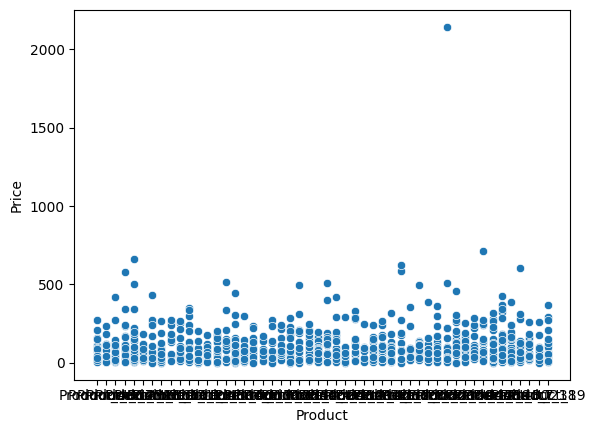

In [689]:
sns.scatterplot(data= df_clean, x = 'Product', y = 'Price')

Now I want to check to see which entry is causing the outlier:

In [690]:
df_clean[df_clean['Price'] > 1000]

,Product,Region,Price,Units Sold,Sale Date
969,Product_15,Region_8,2143.3,5.0,2024-08-27


Because this price was likely incorreclty input, I can check the average price of the other Product_15 sales, and replace this data with that average:

In [691]:
product_15_mean_price = df_clean[(df_clean['Product'] == 'Product_15') & (df_clean['Price'] < 2000)]['Price'].mean()
product_15_mean_price.round(2)


116.89

I will now replace the outlier price value with the mean we found for the prices of the other product_15 entries:

In [692]:
df_clean.loc[(df_clean['Product'] == 'Product_15') & (df_clean['Price'] > 2000), 'Price'] = product_15_mean_price.round(2)

I'll now check to see how the scatterplot improved:

<Axes: xlabel='Product', ylabel='Price'>

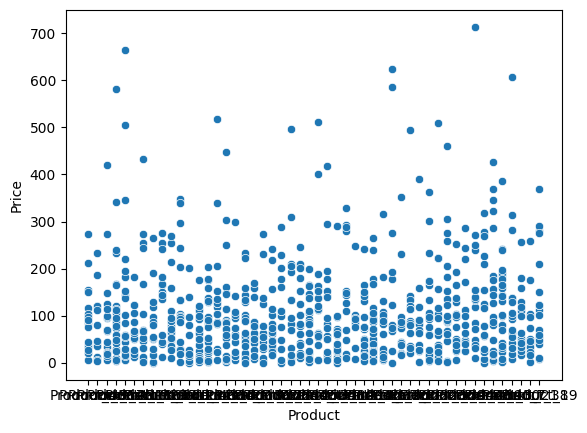

In [693]:
sns.scatterplot(data= df_clean, x = 'Product', y = 'Price')

In [694]:
df_clean.describe(include = 'all')

,Product,Region,Price,Units Sold,Sale Date
count,900,890,989.000000,891.000000,989
unique,50,10,NaN,NaN,989
top,Product_5,Region_9,NaN,NaN,2022-01-01
freq,28,104,NaN,NaN,1
mean,NaN,NaN,104.494404,10.068462,NaN
std,NaN,NaN,99.323301,3.162779,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,32.690000,8.000000,NaN
50%,NaN,NaN,83.006842,10.000000,NaN
75%,NaN,NaN,137.660000,12.000000,NaN


In [695]:
df.describe(include = 'all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [696]:
df_clean_group_product = df_clean.groupby('Product').apply(lambda x: x.reset_index(drop=True))


In [697]:
print(df_clean_group_product[df_clean_group_product['Product'] == 'Product_2'])

                Product     Region       Price  Units Sold   Sale Date
Product                                                               
Product_2 0   Product_2   Region_3  133.226875         6.0  2022-01-13
          1   Product_2   Region_9  296.030000        13.0  2022-02-06
          2   Product_2   Region_2    2.140000         7.0  2022-03-22
          3   Product_2   Region_1   29.390000        16.0  2022-04-21
          4   Product_2   Region_1  102.290000        17.0  2022-06-12
          5   Product_2        NaN  104.480000         8.0  2022-06-15
          6   Product_2   Region_8   26.560000        13.0  2022-06-20
          7   Product_2   Region_3  242.770000         7.0  2022-10-17
          8   Product_2   Region_3   99.020000         4.0  2022-12-16
          9   Product_2   Region_2  203.410000         9.0  2022-12-26
          10  Product_2   Region_9   96.340000        14.0  2023-02-22
          11  Product_2   Region_4  347.200000         NaN  2023-05-04
      

Reviewing the individual product data as a group may help me to think of methods to fill some of the remaining missing data. Seems as though for missing units sold, it would be appropriate to calculate the average order size per product and assume that amount was sold when there's no entry.

In [698]:
print(df_clean[df_clean['Units Sold'].isnull()])

        Product     Region   Price  Units Sold   Sale Date
16   Product_43   Region_6   68.53         NaN  2022-01-17
62    Product_5  Region_10   71.01         NaN  2022-03-04
81   Product_23   Region_5    9.93         NaN  2022-03-23
86    Product_5   Region_6   44.88         NaN  2022-03-28
93   Product_29   Region_6   87.63         NaN  2022-04-04
..          ...        ...     ...         ...         ...
968  Product_45  Region_10    5.48         NaN  2024-08-26
971  Product_11   Region_5   77.22         NaN  2024-08-29
979  Product_21   Region_8  118.93         NaN  2024-09-06
984  Product_44   Region_9  101.69         NaN  2024-09-11
988  Product_42   Region_9  240.97         NaN  2024-09-15

[98 rows x 5 columns]


In [699]:
df_clean['Units Sold'].fillna(df_clean.groupby('Product')['Units Sold'].transform('mean'), inplace=True)

In [700]:
print(df_clean[df_clean['Units Sold'].isnull()])

    Product     Region   Price  Units Sold   Sale Date
301     NaN   Region_2  133.75         NaN  2022-10-29
340     NaN   Region_1   36.82         NaN  2022-12-07
567     NaN   Region_4  266.88         NaN  2023-07-22
806     NaN   Region_9    7.58         NaN  2024-03-17
817     NaN   Region_3  101.54         NaN  2024-03-28
851     NaN  Region_10  195.71         NaN  2024-05-01
872     NaN  Region_10  135.39         NaN  2024-05-22


These remaining 7 entries have no Product or Units Sold data, so I'll go ahead and drop these from our DataFrame

In [701]:
null_units_sold = df_clean[df_clean['Units Sold'].isnull()]
null_units_sold_indexes = null_units_sold.index
df_clean.drop(null_units_sold_indexes, inplace=True)

In [702]:
print(df_clean[df_clean['Units Sold'].isnull()])

Empty DataFrame
Columns: [Product, Region, Price, Units Sold, Sale Date]
Index: []


In [703]:
df_clean.describe(include='all')


,Product,Region,Price,Units Sold,Sale Date
count,900,883,982.000000,982.000000,982
unique,50,10,NaN,NaN,982
top,Product_5,Region_9,NaN,NaN,2022-01-01
freq,28,103,NaN,NaN,1
mean,NaN,NaN,104.345515,10.061387,NaN
std,NaN,NaN,99.418463,3.025656,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,32.555000,8.000000,NaN
50%,NaN,NaN,82.650000,10.000000,NaN
75%,NaN,NaN,137.615000,12.000000,NaN


In [704]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [705]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      883 non-null    object 
 2   Price       982 non-null    float64
 3   Units Sold  982 non-null    float64
 4   Sale Date   982 non-null    object 
dtypes: float64(2), object(3)
memory usage: 46.0+ KB


In [706]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [707]:
df_clean['Units Sold'] = df_clean['Units Sold'].astype(int)

In [708]:
df_clean['Product'].isnull().sum()

82

In [709]:
product_is_null = df_clean[df_clean['Product'].isnull()]

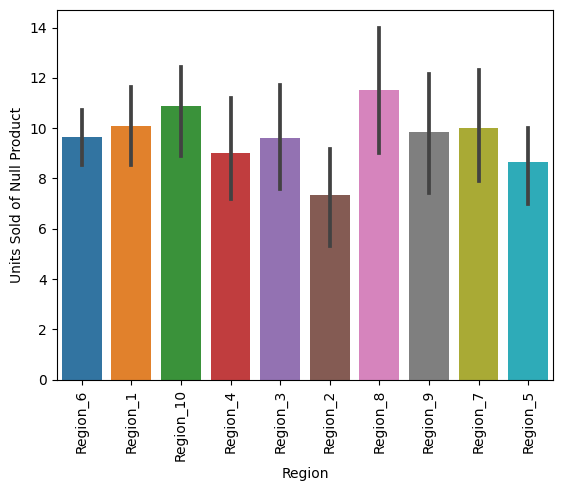

In [710]:
sns.barplot(data=product_is_null, x='Region', y='Units Sold')
plt.xticks(rotation=90)
plt.ylabel('Units Sold of Null Product')
plt.show()

To enable further analysis, I want to add a column to my DataFrame called 'Revenue' which would simply be the product of price and units sold:

In [711]:
df_clean['Revenue'] = df_clean['Price'] * df_clean['Units Sold']

In [712]:
df_clean

,Product,Region,Price,Units Sold,Sale Date,Revenue
0,NaN,Region_6,75.96,10,2022-01-01,759.60
1,NaN,Region_1,175.78,8,2022-01-02,1406.24
2,Product_46,Region_3,20.43,12,2022-01-03,245.16
3,Product_36,Region_1,12.77,10,2022-01-04,127.70
4,Product_17,Region_6,125.69,6,2022-01-05,754.14
...,...,...,...,...,...,...
995,NaN,Region_7,31.83,13,2024-09-22,413.79
996,Product_36,NaN,46.19,9,2024-09-23,415.71
997,NaN,Region_7,311.80,13,2024-09-24,4053.40
998,Product_2,Region_10,43.44,15,2024-09-25,651.60


In [714]:
product_is_null = df_clean[df_clean['Product'].isnull()]

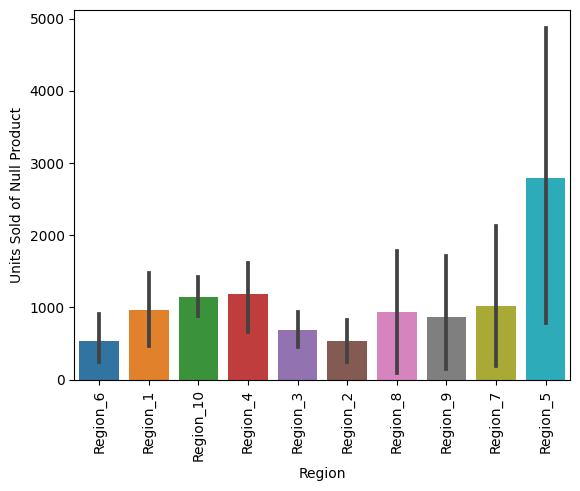

In [717]:
sns.barplot(data=product_is_null, x='Region', y='Revenue')
plt.xticks(rotation=90)
plt.ylabel('Units Sold of Null Product')
plt.show()

This plot shows that Region_5 has a lot of revenue coming from sales where the Product was not marked down. Because it's significant, I want to find a way to fill in these null entries that will maintain the credibility of the data.